In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
import ipywidgets as widgets
from IPython.display import display, clear_output
import os

In [5]:
train_dir = 'chest/train'
val_dir = 'chest/val'
test_dir = 'chest/test'

# Buat image data generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
model = Sequential([
    # Layer Konvolusi pertama
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    # Layer Konvolusi kedua
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Layer Konvolusi ketiga untuk fitur yang lebih kompleks
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Layer Konvolusi keempat
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Meratakan output dari layer konvolusi
    Flatten(),

    # Menambahkan Dropout untuk mencegah overfitting
    Dropout(0.5),

    # Layer Dense
    Dense(512, activation='relu'),

    # Layer output dengan aktivasi sigmoid untuk klasifikasi biner
    Dense(1, activation='sigmoid')
])


model.summary()

d:\project ngoding\fullstack pneumonia app detect\model\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Mengompilasi model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Melatih model dengan data generator
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size, # Jumlah batch per epoch
    epochs=25, # Jumlah epoch
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size # Jumlah batch validasi
)

Epoch 1/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step - accuracy: 0.7422 - loss: 0.5665

d:\project ngoding\fullstack pneumonia app detect\model\venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 77s 467ms/step - accuracy: 0.7487 - loss: 0.5256 - val_accuracy: 0.6250 - val_loss: 0.7907
Epoch 2/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 47s 286ms/step - accuracy: 0.7857 - loss: 0.4230 - val_accuracy: 0.6875 - val_loss: 0.5779
Epoch 3/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 46s 285ms/step - accuracy: 0.8487 - loss: 0.3422 - val_accuracy: 0.8750 - val_loss: 0.2776
Epoch 4/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 48s 292ms/step - accuracy: 0.8888 - loss: 0.2590 - val_accuracy: 0.8750 - val_loss: 0.2940
Epoch 5/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 47s 291ms/step - accuracy: 0.8992 - loss: 0.2458 - val_accuracy: 0.8750 - val_loss: 0.3540
Epoch 6/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 46s 283ms/step - accuracy: 0.9078 - loss: 0.2279 - val_accuracy: 0.5000 - val_loss: 1.9247
Epoch 7/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 47s 289ms/step - accuracy: 0.9193 - loss: 0.1976 - val_accuracy: 0.6875 - val_loss: 0.8905
Epoch 8/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 48s 292ms/step - accuracy: 0.9279 - loss: 0.1768 - val

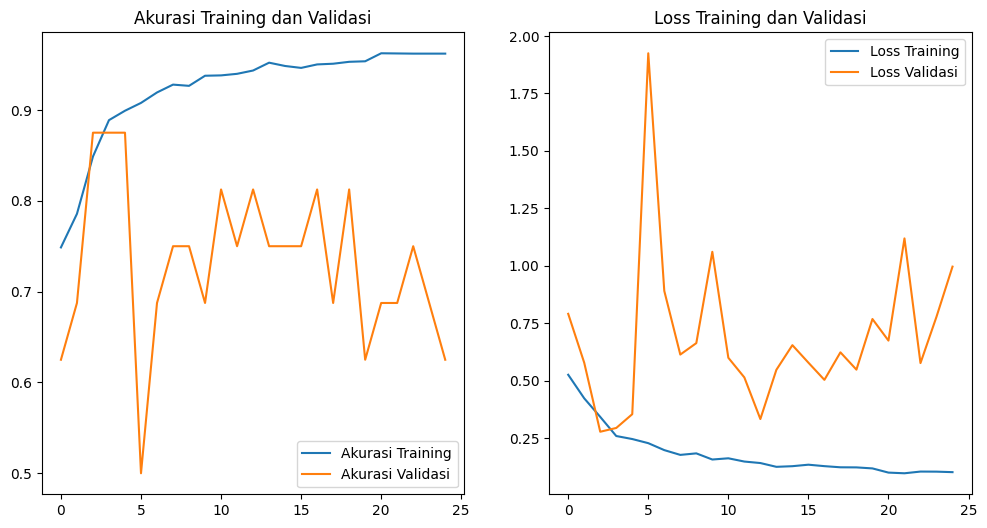

In [ ]:
# nilai akurasi dan loss dari history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

# plot untuk Akurasi
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Akurasi Training')
plt.plot(epochs_range, val_acc, label='Akurasi Validasi')
plt.legend(loc='lower right')
plt.title('Akurasi Training dan Validasi')

# plot untuk Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Loss Training')
plt.plot(epochs_range, val_loss, label='Loss Validasi')
plt.legend(loc='upper right')
plt.title('Loss Training dan Validasi')
plt.show()

In [ ]:
def predict_image(img_path):
    """Fungsi untuk memprediksi gambar tunggal."""

    img = image.load_img(img_path, target_size=(150, 150))

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    x = x / 255.0

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    
    print(f"File: {img_path}")
    print(f"Nilai Prediksi: {classes[0][0]}")
    
    if classes[0] > 0.5:
        print("Hasil: Terdeteksi PNEUMONIA")
    else:
        print("Hasil: NORMAL")


try:
    predict_image('chest/test/NORMAL/IM-0001-0001.jpeg')
    print("-" * 30)
    predict_image('chest/test/PNEUMONIA/person1_virus_6.jpeg')
except FileNotFoundError:
    print("\nPastikan path file gambar sudah benar!")
    print("Misalnya: 'chest/test/NORMAL/nama_file.jpeg'")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
File: chest/test/NORMAL/IM-0001-0001.jpeg
Nilai Prediksi: 0.8584219217300415
Hasil: Terdeteksi PNEUMONIA
------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
File: chest/test/PNEUMONIA/person1_virus_6.jpeg
Nilai Prediksi: 0.9999996423721313
Hasil: Terdeteksi PNEUMONIA
